In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

R1 = 47000
RC = 3900
RE = 120
VCC = 12
VBE = 0.7



def plotseveral(plot,var,func):
    BetaValues = [90,200,350,550,750,950]
    for i in range(0,len(BetaValues)-1):
        plot.plot(var,func(var,BetaValues[i]), label=f"{BetaValues[i]}")
   
    


# Microphone amplifier analysis

This circuit uses a variable resistor to adjust the base voltage and the base current. To simplify the analysis, we used Thevenin’s theorem. Both Thevenin’s voltage and the resistor depend on the variable resistor.

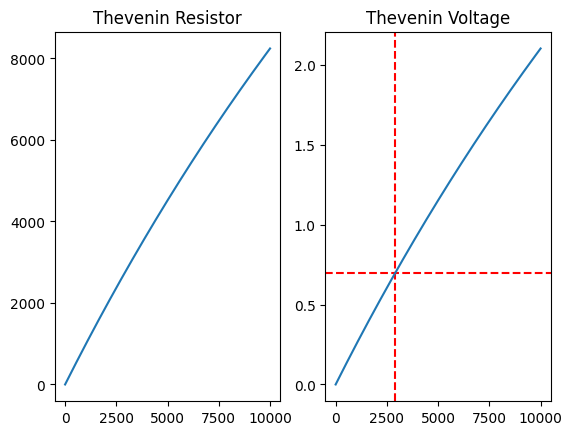

In [13]:
def Rt(R):
    return (R1*R)/(R1+R) 
def Vt(R):
    return VCC * (R)/(R1 + R)
def Vtsolve(R):
    return Vt(R) - VBE
initial = -2
min_resistance = fsolve(Vtsolve,initial)

R = np.linspace(0,10000,1000)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Thevenin Resistor")
ax[0].plot(R,Rt(R))
ax[1].set_title("Thevenin Voltage")
ax[1].axvline(min_resistance,color="red",linestyle="--")
ax[1].axhline(0.7,color="red",linestyle="--")
ax[1].plot(R,Vt(R))

This variable resistor also modifies the Collector current due to the change in base current. As the beta value increases, the term Rt/Beta tends to zero, so there is not much difference in the collector current.
It's important to notice that if the variable resistance causes a voltage lower than 0.7, the circuit would not work. After the next graph, all the resistance values will be in the valid zone

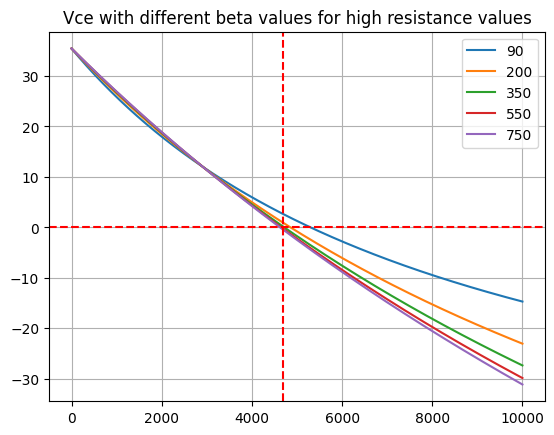

In [14]:
def Ic(R,Beta):
    return (Vt(R)-VBE)/( (Rt(R)/Beta) + RE)

def Vce(R,Beta):
    return 12 - Ic(R,Beta)*(RC+RE)

def Vcesolve(R):
    return Vce(R,400)

max_resistance = fsolve(Vcesolve,1)
plt.title("Vce with different beta values for high resistance values")
plotseveral(plt,R,Vce)
plt.axvline(max_resistance,color="red",linestyle="--")
plt.axhline(0,color="red",linestyle="--")
plt.legend(loc="best")
plt.grid(True)

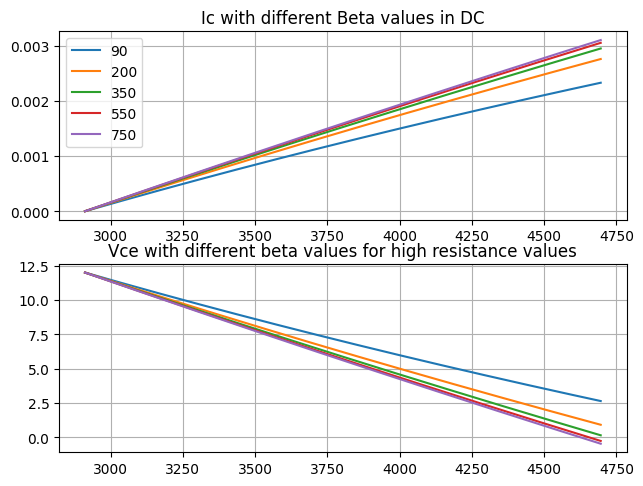

In [15]:

R = np.linspace(min_resistance,max_resistance,1000)
fig,ax = plt.subplots(2,1)
fig.tight_layout()
ax[0].set_title("Ic with different Beta values in DC")
plotseveral(ax[0],R,Ic)
ax[0].legend(loc="best")
ax[0].grid(True)
ax[1].set_title("Vce with different beta values for high resistance values")
plotseveral(ax[1],R,Vce)
ax[1].grid(True)

Now, we can draw the load lines and know where a good polarization should be. Lets analize a single case where 

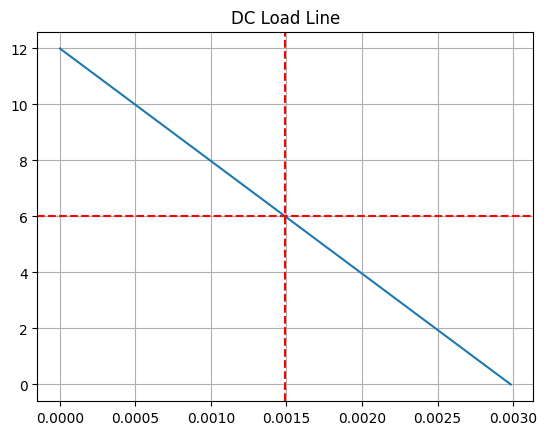

In [16]:
plt.plot(Ic(R,400),Vce(R,400))
plt.title("DC Load Line")
plt.axvline(Ic(max_resistance,400)/2, color="red",linestyle="--")
plt.axhline(Vce(min_resistance,400)/2, color="red",linestyle="--")
plt.grid(True)